# 📧 Email Spam Detection – EDA & Preprocessing

This notebook focuses on **Exploratory Data Analysis (EDA)** and **Text Preprocessing** for the spam detection project.

We will:
1. Explore the dataset structure and class distribution.  
2. Perform basic text analysis (message lengths, word frequencies).  
3. Clean and preprocess text (lowercasing, removing stopwords/punctuation, etc.).  
4. Convert text into numerical form using **TF-IDF vectorization**.  
5. Save the processed features for model training.


In [5]:
# 1. Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# 2. Load dataset
df = pd.read_csv("../data/spam raw.csv", encoding="latin-1")

# df = df[['v1', 'v2']]
# df.columns = ['Category', 'Message']
# df['label'] = df['label'].map({'ham':0, 'spam':1})

print("Dataset shape:", df.shape)
df.head()
print(df.columns)

df = df.rename(columns={"Category": "label", "Message": "message"})

# Encode labels (ham=0, spam=1)
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

print(df.head())


Dataset shape: (5572, 2)
Index(['Category', 'Message'], dtype='object')
   label                                            message
0      0  Go until jurong point, crazy.. Available only ...
1      0                      Ok lar... Joking wif u oni...
2      1  Free entry in 2 a wkly comp to win FA Cup fina...
3      0  U dun say so early hor... U c already then say...
4      0  Nah I don't think he goes to usf, he lives aro...


### 🔎 Dataset Overview
- The dataset has two columns:  
  - **label** → target variable (0 = ham, 1 = spam)  
  - **message** → email/text content  

We will now check for missing values and class balance.


### 📊 Class Imbalance
- Usually, spam datasets are **imbalanced** (more ham than spam).  
- This imbalance can affect model performance → so we will monitor precision/recall carefully.


label      0
message    0
dtype: int64


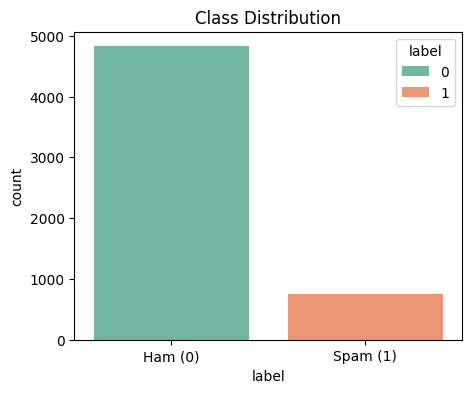

label
0    0.865937
1    0.134063
Name: proportion, dtype: float64

In [8]:
# 3. Check missing values & class distribution
print(df.isnull().sum())

plt.figure(figsize=(5,4))
sns.countplot(x='label', data=df, palette='Set2', hue= 'label', legend='brief')
plt.xticks([0,1], ['Ham (0)', 'Spam (1)'])
plt.title("Class Distribution")
plt.show()

df['label'].value_counts(normalize=True)


### 📝 Message Length Analysis
- Spam messages are often **longer** or contain certain patterns (links, offers, etc.).  
- Ham messages are usually shorter and casual.


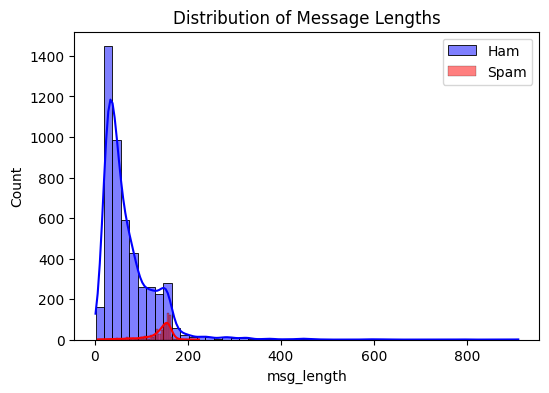

label
0     71.524767
1    138.432396
Name: msg_length, dtype: float64

In [9]:
# 4. Text statistics
df['msg_length'] = df['message'].apply(len)

plt.figure(figsize=(6,4))
sns.histplot(df[df['label']==0]['msg_length'], bins=50, color='blue', label='Ham', kde=True)
sns.histplot(df[df['label']==1]['msg_length'], bins=50, color='red', label='Spam', kde=True)
plt.legend()
plt.title("Distribution of Message Lengths")
plt.show()

df.groupby('label')['msg_length'].mean()


### ☁️ WordCloud Observations
- Spam messages tend to include **money-related words** ("win", "free", "cash", "prize").  
- Ham messages have more **casual/neutral words**.


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ghost\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


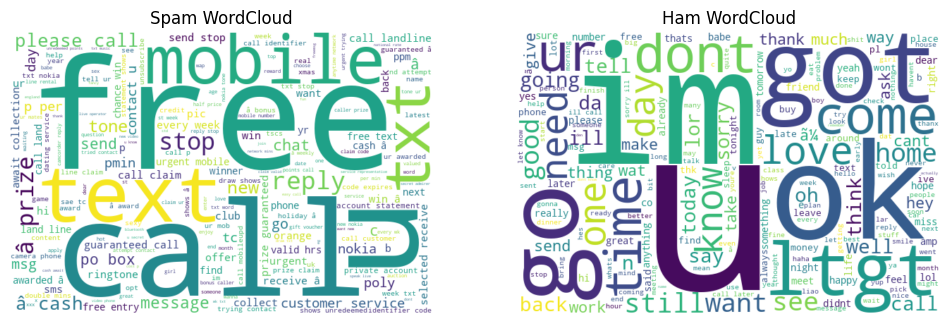

In [10]:
# 5. Most common words
from collections import Counter
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()                                # lowercase
    text = re.sub(r'\d+', '', text)                    # remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # remove punctuation
    words = [w for w in text.split() if w not in STOPWORDS]
    return " ".join(words)

df['clean_message'] = df['message'].apply(clean_text)

# WordCloud for spam
spam_words = " ".join(df[df['label']==1]['clean_message'])
ham_words = " ".join(df[df['label']==0]['clean_message'])

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
wc = WordCloud(width=600, height=400, background_color='white').generate(spam_words)
plt.imshow(wc, interpolation='bilinear'); plt.axis("off"); plt.title("Spam WordCloud")

plt.subplot(1,2,2)
wc = WordCloud(width=600, height=400, background_color='white').generate(ham_words)
plt.imshow(wc, interpolation='bilinear'); plt.axis("off"); plt.title("Ham WordCloud")
plt.show()


In [12]:
# 6. TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
X = tfidf.fit_transform(df['clean_message'])
y = df['label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Save processed data
import pickle
pickle.dump((X_train, X_test, y_train, y_test, tfidf), open("../data/processed_spam_data.pkl", "wb"))

print("✅ Preprocessing complete. Data saved for model pipeline.")


✅ Preprocessing complete. Data saved for model pipeline.
